<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-EEG-data" data-toc-modified-id="Load-EEG-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load EEG data</a></span></li><li><span><a href="#Jittering" data-toc-modified-id="Jittering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jittering</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Flipping" data-toc-modified-id="Flipping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Flipping</a></span></li><li><span><a href="#Permutation" data-toc-modified-id="Permutation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Permutation</a></span></li><li><span><a href="#Time-warping" data-toc-modified-id="Time-warping-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Time-warping</a></span></li><li><span><a href="#Time-Shifting" data-toc-modified-id="Time-Shifting-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Time Shifting</a></span></li><li><span><a href="#Slicing-+-Resizing" data-toc-modified-id="Slicing-+-Resizing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Slicing + Resizing</a></span></li><li><span><a href="#Rotation" data-toc-modified-id="Rotation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Rotation</a></span></li><li><span><a href="#Time-band-masking-(subsequence-masking)" data-toc-modified-id="Time-band-masking-(subsequence-masking)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Time band-masking (subsequence masking)</a></span></li><li><span><a href="#Time-random-masking" data-toc-modified-id="Time-random-masking-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Time random-masking</a></span></li><li><span><a href="#Frequency-band-masking" data-toc-modified-id="Frequency-band-masking-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Frequency band-masking</a></span></li><li><span><a href="#Frequency-random-masking" data-toc-modified-id="Frequency-random-masking-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Frequency random-masking</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Time-wise-neighboring" data-toc-modified-id="Time-wise-neighboring-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Time-wise neighboring</a></span></li><li><span><a href="#Channel-wise-neighboring" data-toc-modified-id="Channel-wise-neighboring-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Channel-wise neighboring</a></span></li></ul></div>

In [11]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import random
import scipy

# Load EEG data

In [7]:
import pickle as pk
EEG_data = pk.load(open("EEG_datasets/data0.p", 'rb'), encoding='iso-8859-1')

In [13]:
sample = EEG_data[0:250, 0]

In [9]:
sample.shape

(250,)

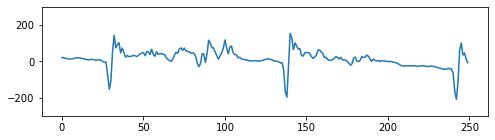

In [12]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample)

# plt.savefig('images/original_eeg.svg',dpi=600,format='svg')

# Jittering

In [415]:
def jittering(sample, mean=0, var=300):
    # usually set var as 1, here use a large number to be better demostration of jittering
    jittering_sample = sample + np.random.normal(mean, var ** 0.5, sample.shape)
    return jittering_sample
jittering_sample = jittering(sample, mean=0, var=300)

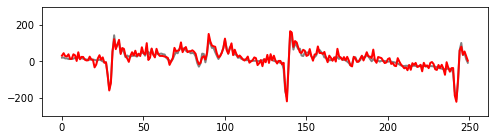

In [417]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(jittering_sample, color='red', linewidth=2.0)

# plt.savefig('images/jittering.svg',dpi=600,format='svg')

# Scaling

In [121]:
def scaling(sample, ratio=1.1):
    scaling_sample = sample * ratio
    return scaling_sample

scaling_sample = scaling(sample, ratio=1.5)

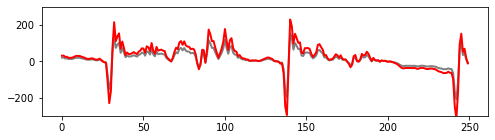

In [369]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(scaling_sample, color='red', linewidth=2.0)

# plt.savefig('images/scaling.svg',dpi=600,format='svg')

# Flipping

In [143]:
def flipping(sample):
    flipping_sample = np.flip(sample)
    return flipping_sample

In [144]:
flipping_sample = flipping(sample)

array([-7.01553748e+00,  1.25156972e+01,  4.66953580e+01,  3.52512752e+01,
        1.02084719e+02,  6.19541351e+01, -1.12911451e+02, -2.09194334e+02,
       -1.65859407e+02, -6.45411272e+01, -4.16529615e+01, -4.18055493e+01,
       -3.78382673e+01, -4.22633126e+01, -4.28736637e+01, -4.30262515e+01,
       -3.98219083e+01, -3.78382673e+01, -3.61598018e+01, -3.21925197e+01,
       -2.85304132e+01, -2.76148866e+01, -2.59364211e+01, -2.59364211e+01,
       -2.77674744e+01, -2.80726499e+01, -2.66993600e+01, -2.42579556e+01,
       -2.36476045e+01, -2.39527801e+01, -2.62415967e+01, -2.74622988e+01,
       -2.48683067e+01, -2.36476045e+01, -2.48683067e+01, -2.39527801e+01,
       -2.39527801e+01, -2.42579556e+01, -2.36476045e+01, -2.54786578e+01,
       -2.51734823e+01, -2.19691391e+01, -1.69337426e+01, -1.14405828e+01,
       -7.77847633e+00, -5.18448422e+00, -2.89566765e+00, -1.06461440e+00,
        3.50000000e-03, -1.21720217e+00,  9.19026627e-01,  2.75007988e+00,
        2.13972880e+00,  

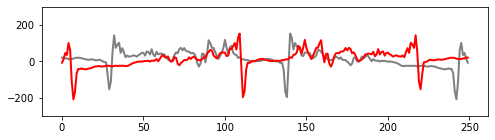

In [370]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(flipping_sample, color='red', linewidth=2.0)

# plt.savefig('images/flipping.svg',dpi=600,format='svg')

# Permutation

In [118]:
def permutation(x, n_segments=5, pertub_mode="random", seg_mode ="equal"):
    """This function is for univariate, equal segmentation, and random permuation. But it's easy to expand to more modes."""
    
    T = x.shape[0]
    
    sublength = int(T/n_segments)
    augmented = np.zeros_like(x)
    idx = np.random.permutation(n_segments) # random shuffling the order
#     print(idx)
    for i in range(n_segments):
        j = idx[i]
        augmented[i*sublength: (i+1)*sublength] = x[j*sublength: (j+1)*sublength]
    return  augmented 

In [119]:
# x = sample
permutation_sample = permutation(sample)

[3 1 4 0 2]


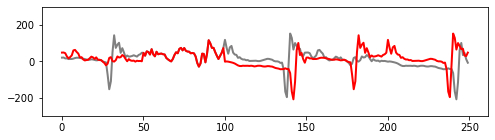

In [371]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(permutation_sample, color='red', linewidth=2.0)

# plt.savefig('images/permutation.svg',dpi=600,format='svg')

# Time-warping

Require two time series. 

# Time Shifting

In [173]:
def time_shiftng(x):
    
    T = x.shape[0]
    n_range = list((range(int(-(T/2)), int(T/2))))
    n = random.choice(n_range)  # shifitng length
    return n

In [174]:
shifting_length = time_shiftng(sample)

In [193]:
# shifting_length = 10 # set 40 here only for better demostration

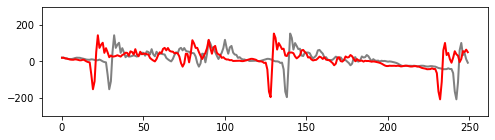

In [372]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(Epilepsy_data[0+shifting_length:250+shifting_length, 0], color='red', linewidth=2.0)

# plt.savefig('images/time_shifting.svg',dpi=600,format='svg')

# Slicing + Resizing 

In [8]:
from scipy import interpolate

x = np.linspace(0,124,125)
y = sample[:125]

x_new = np.linspace(0,124,250)
interp_func = interpolate.interp1d(x,y,kind='slinear')  # "nearest","zero","slinear","quadratic","cubic"
y_new = interp_func(x_new)

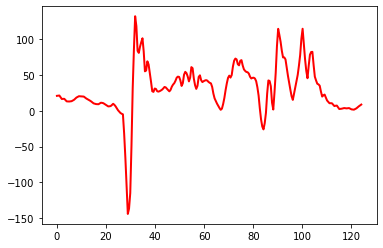

In [230]:
# plt.plot(x_new,y_new, color='red', linewidth=2.0)

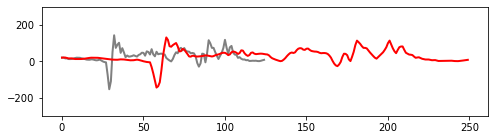

In [10]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(range(0,125), sample[:125], color='grey', linewidth=2.0)

plt.plot(y_new, color='red', linewidth=2.0)
# plt.plot(sample, color='green', linewidth=2.0)

# plt.savefig('images/crop_resizing.svg',dpi=600,format='svg')

# Rotation

In [235]:
rotation_sample = sample * -1

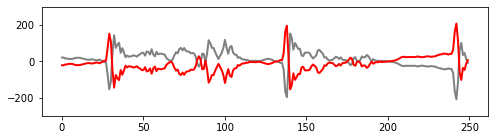

In [374]:
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(rotation_sample, color='red', linewidth=2.0)

# plt.savefig('images/rotation.svg',dpi=600,format='svg')

# Time band-masking (subsequence masking)

139 189 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


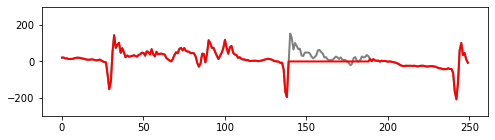

In [375]:
start = np.random.choice(sample.shape[0]-10)
end = start + 50
time_band_masked_sample = sample.copy()
time_band_masked_sample[start:end]=0
print(start, end, time_band_masked_sample[start:end])
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(time_band_masked_sample, color='red', linewidth=2.0)

# plt.savefig('images/subsequence_masking.svg',dpi=600,format='svg')

# Time random-masking

In [12]:
def random_mask(x, pertub_ratio=0.5):
    mask = np.random.choice([0, 1], size=(sample.shape[0]), p=[pertub_ratio, (1-pertub_ratio)])
    return x*mask

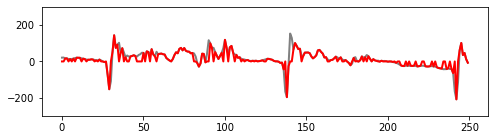

In [13]:
def time_random_masking(sample, pertub_ratio=0.1):
    time_random_masked_sample = random_mask(sample, pertub_ratio)
    return time_random_masked_sample

time_random_masked_sample = time_random_masking(sample, pertub_ratio=0.3)
figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(time_random_masked_sample, color='red', linewidth=2.0)

# plt.savefig('images/time_radom_masking.svg',dpi=600,format='svg')

# Frequency band-masking

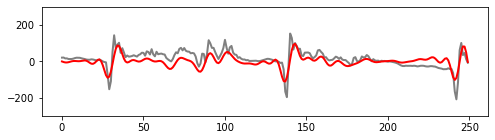

In [397]:
from scipy import signal
 
def frequency_band_masking(sample, fs, low, high, order):
    b, a = signal.butter(order, [low*2/fs, high*2/fs], 'bandpass')   
    freq_masked_sample = signal.filtfilt(b, a, sample)  
    return freq_masked_sample
freq_masked_sample = frequency_band_masking(sample, fs=250, low=4, high=30, order=8)

figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(freq_masked_sample, color='red', linewidth=2.0)

# plt.savefig('images/freq_band_masking.svg',dpi=600,format='svg')

# Frequency random-masking

In [336]:
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift, ifft

def random_mask(x, pertub_ratio=0.5):
    mask = np.random.choice([0, 1], size=(sample.shape[0]), p=[pertub_ratio, (1-pertub_ratio)])
    return x*mask

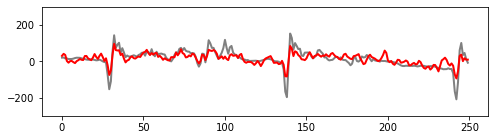

In [398]:
def frequency_random_masking(sample):
    freq_spectrum = fft(sample)  
    masked_spectrum = random_mask(freq_spectrum)
    freq_random_masked_sample = ifft(masked_spectrum)
    return freq_random_masked_sample

freq_random_masked_sample = frequency_random_masking(sample)

figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(freq_random_masked_sample, color='red', linewidth=2.0)

# plt.savefig('images/freq_random_masking.svg',dpi=600,format='svg')

# Filtering

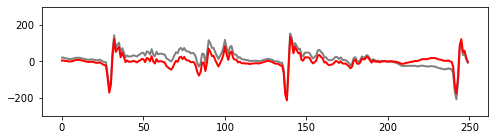

In [399]:
from scipy import signal

def filtering(sample, fs, low, high, order, pattern='highpass'):
    if pattern == 'bandpass':
        b, a = signal.butter(order, [low*2/fs, high*2/fs], pattern)   
    elif pattern == 'lowpass':
        b, a = signal.butter(order, low*2/fs, pattern)   
    elif pattern == 'highpass':
        b, a = signal.butter(order,  high*2/fs, pattern) 
    freq_masked_sample = signal.filtfilt(b, a, sample)  
    return freq_masked_sample

filted_sample = filtering(sample, fs=250, high=4, order=8, pattern='highpass') 

figure(figsize=(8, 2))
plt.ylim((-300, 300))
plt.plot(sample, color='grey', linewidth=2.0)
plt.plot(filted_sample, color='red', linewidth=2.0)

# plt.savefig('images/filtering.svg',dpi=600,format='svg')

# Time-wise neighboring

In [245]:
long_sample = Epilepsy_data[0:1000, 0]

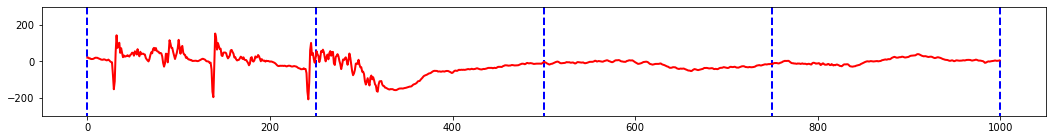

In [400]:
figure(figsize=(18, 2))
plt.ylim((-300, 300))
plt.plot((0, 0), (300, -300),'b--',lw=2)
plt.plot((1000, 1000), (300, -300),'b--',lw=2)

plt.plot((250, 250), (300, -300),'b--',lw=2)
plt.plot((500, 500), (300, -300),'b--',lw=2)
plt.plot((750, 750), (300, -300),'b--',lw=2)
plt.plot(long_sample, color='red', linewidth=2.0)

# plt.savefig('images/time_wise_neighboring.svg',dpi=600,format='svg')

# Channel-wise neighboring

Require two channels.